In [14]:
import pandas as pd
import seaborn
from matplotlib import pyplot as plt

data = pd.read_excel("dateset/rollingsales/rollingsales_bronx.xls", skiprows=4)
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 4G",,...,0,0,0,0,0,1958,2,D4,150000,2013-02-06
5264,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 5D",,...,0,0,0,0,0,1958,2,D4,108500,2013-04-10
5265,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 2J",,...,0,0,0,0,0,1957,2,D4,126000,2012-09-28
5266,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 1G",,...,0,0,0,0,0,1957,2,D4,125000,2013-05-23


In [2]:
clean_data = pd.read_excel("dateset/rollingsales/rollingsales_bronx.xls", skiprows=4)
clean_data.columns = [column.lower().replace("\n", "_").replace(" ", "_").replace("-", "_") for column in clean_data.columns] 
clean_data

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,apart_ment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 4G",,...,0,0,0,0,0,1958,2,D4,150000,2013-02-06
5264,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 5D",,...,0,0,0,0,0,1958,2,D4,108500,2013-04-10
5265,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 2J",,...,0,0,0,0,0,1957,2,D4,126000,2012-09-28
5266,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 1G",,...,0,0,0,0,0,1957,2,D4,125000,2013-05-23


In [3]:
building_categories = ["homes","condos", "apartments", "buildings", "residential", "factories", "garages", 
                       "warehouses", "land", "facilities"]

def add_build_category (category:str):
    buffer = ""
    for type in building_categories:
        if type.upper() in category:
            buffer = type
            break
    return buffer if buffer != "" else "other"

clean_data = clean_data[(clean_data.total_units >0) & (clean_data.land_square_feet > 0)]
clean_data['quantile'] = pd.qcut(clean_data.sale_price, 10, labels=False, duplicates='drop')
clean_data = clean_data[(clean_data['quantile'] > 0) & (clean_data['quantile'] < 10)]
        
clean_data.insert(2,"type_building",[add_build_category(category) for category in clean_data.building_class_category.to_list()])
clean_data['price_per_feet'] = clean_data.sale_price / clean_data.land_square_feet
new_data_with_type_building = clean_data
new_data_with_type_building

C:\Users\Andrey\AppData\Local\Temp\ipykernel_12836\2542947147.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['quantile'] = pd.qcut(clean_data.sale_price, 10, labels=False, duplicates='drop')


,borough,neighborhood,type_building,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,quantile,price_per_feet
0,2,BATHGATE,homes,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,...,1,1842,2048,1901,1,A5,355000,2013-07-08,3,192.725299
1,2,BATHGATE,homes,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,...,1,1103,1290,1910,1,A1,474819,2013-05-20,4,430.479601
2,2,BATHGATE,homes,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,...,1,1986,1344,1899,1,A1,210000,2013-03-12,1,105.740181
3,2,BATHGATE,homes,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,...,1,2329,1431,1901,1,A1,343116,2013-07-01,2,147.323315
5,2,BATHGATE,homes,02 TWO FAMILY HOMES,1,2912,158,,B1,505 EAST 171ST STREET,...,2,2000,2400,1993,1,B1,316500,2012-12-27,2,158.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,2,WOODLAWN,homes,03 THREE FAMILY HOMES,1,3385,44,,C0,335 EAST 236 STREET,...,3,7754,3539,1910,1,C0,630000,2013-03-13,5,81.248388
5245,2,WOODLAWN,apartments,07 RENTALS - WALKUP APARTMENTS,2A,3376,70,,C2,265 EAST 235 STREET,...,5,6100,2640,1925,2,C2,709600,2013-05-21,5,116.327869
5246,2,WOODLAWN,apartments,07 RENTALS - WALKUP APARTMENTS,2,3377,80,,C1,251 EAST 236 STREET,...,22,5000,17400,1912,2,C1,2250000,2013-08-01,6,450.000000
5247,2,WOODLAWN,apartments,07 RENTALS - WALKUP APARTMENTS,2A,3379,76,,C2,257 EAST 238 STREET,...,6,3000,3350,1927,2,C2,700000,2012-08-29,5,233.333333


In [4]:
grouped_type_build_data = new_data_with_type_building.groupby("type_building",as_index=False).count()
grouped_type_build_data

,type_building,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,quantile,price_per_feet
0,apartments,341,341,341,341,341,341,341,341,341,...,341,341,341,341,341,341,341,341,341,341
1,buildings,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
2,facilities,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
3,factories,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
4,garages,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
5,homes,1678,1678,1678,1678,1678,1678,1678,1678,1678,...,1678,1678,1678,1678,1678,1678,1678,1678,1678,1678
6,land,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7,other,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
8,warehouses,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36


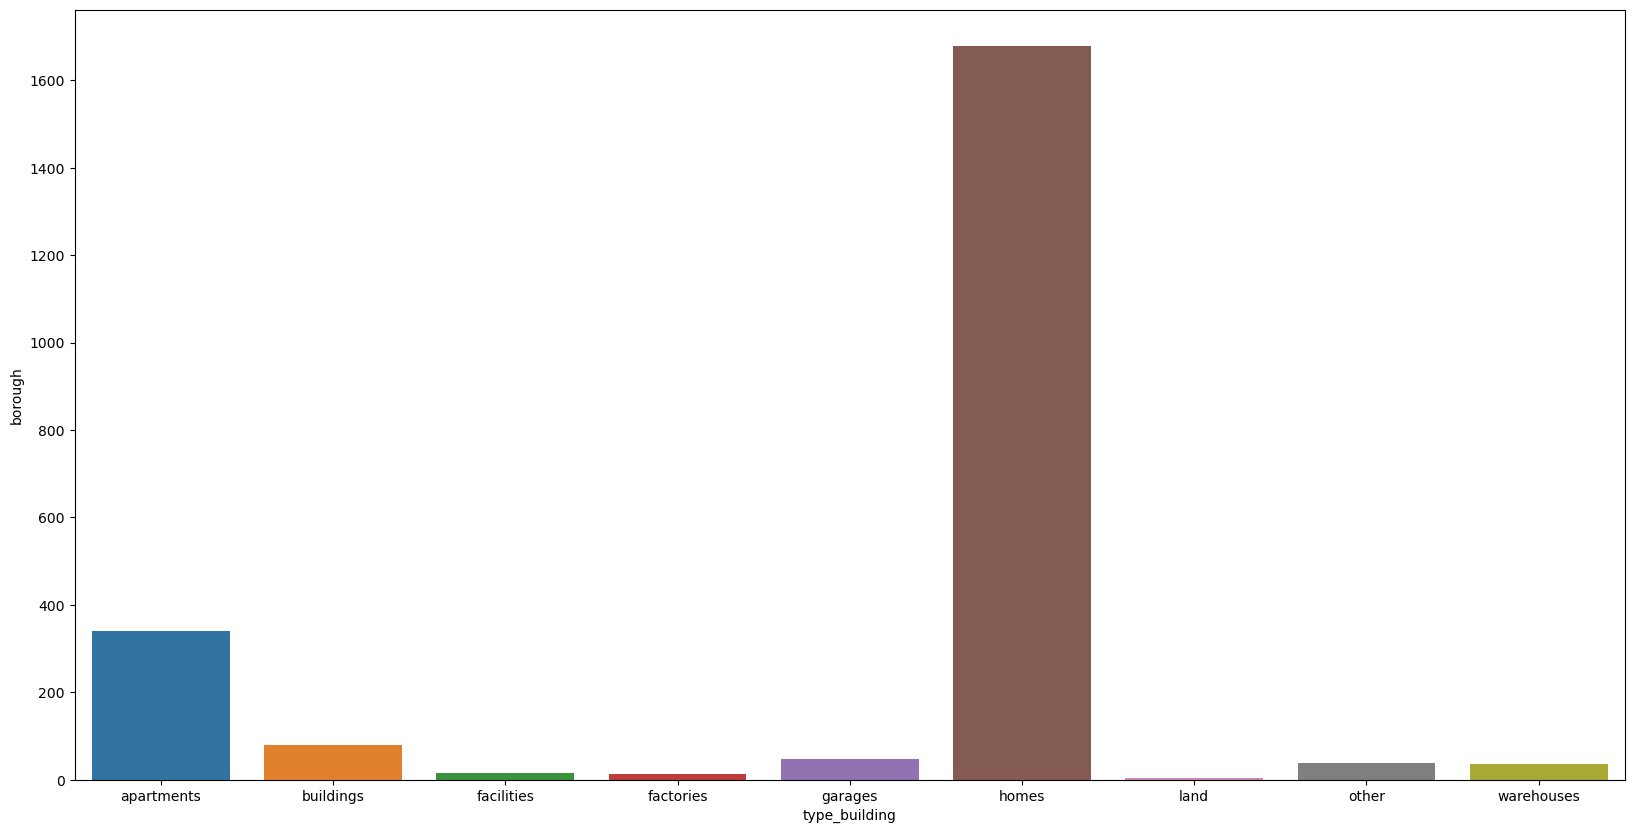

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = seaborn.barplot( data=grouped_type_build_data, 
                x=grouped_type_build_data.type_building, 
                y=grouped_type_build_data.borough)

<AxesSubplot:xlabel='date', ylabel='price_per_feet'>

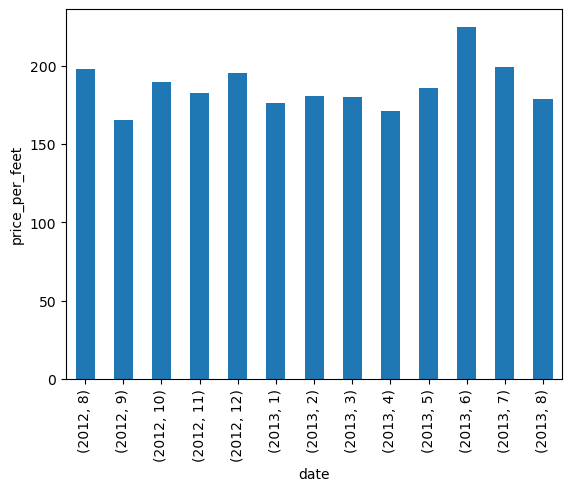

In [16]:
group_data_by_year = clean_data.groupby([clean_data["sale_date"].dt.year, clean_data["sale_date"].dt.month],group_keys=True)["price_per_feet"].mean()
group_data_by_year.plot(kind = "bar", xlabel="date", ylabel="price_per_feet")

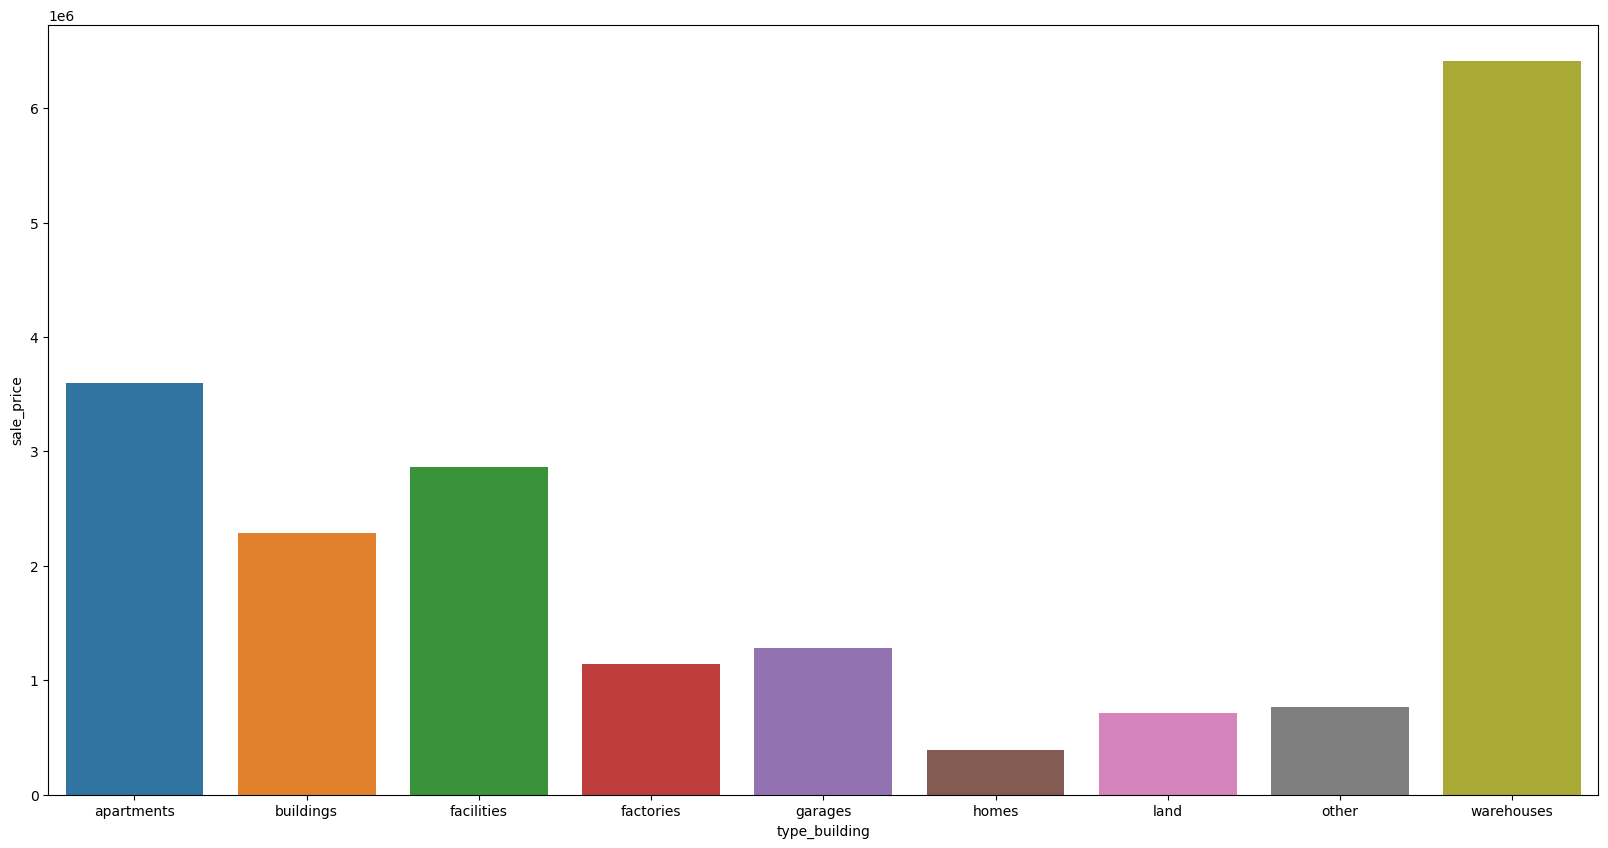

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
group2 = clean_data.groupby(["type_building"],as_index=False).mean()
ax = seaborn.barplot(data=group2, 
                x=group2.type_building, 
                y=group2.sale_price)